# Mašinsko učenje - Linearna regresija

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 0.64.

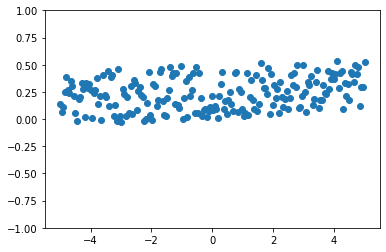

In [2]:
def f(x):
    return 0.01*x+np.random.random(len(x))*0.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.ylim(-1, 1)
plt.scatter(x, y)

## Zadatak 2

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 2.14.

0.6373286952849071 0.7668900830385597


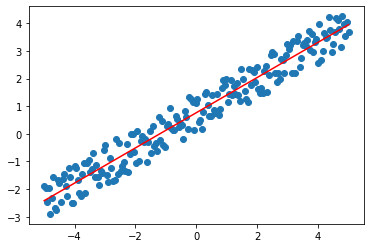

In [3]:
def f(x):
    return 0.63*x+np.random.random(len(x))*1.5

x = np.linspace(-5, 5, 200)
y = f(x)

def lin_reg(x, y):
    # y = ax + b
    # a = (n*sum(x*y) - sum(x)sum(y))/(n*(sum(x^2)-sum(x)^2))
    # b = (1/n)*(sum(y) - a*sum(x))
    
    sx = np.sum(x)
    sy = np.sum(y)
    sx2 = np.sum(x*x)
    sxy = np.sum(x*y)
    n = len(x)
    
    a = (n*sxy -sx*sy)/(n*(sx2-sx*sx))
    b = (sy - a*sx) /n
    
    return a, b

a,b = lin_reg(x,y)
print(a,b)


plt.scatter(x, y)
plt.plot(x, a*x+b, "r")

## Zadatak 3

Na osnovu zadatog skupa podataka odrediti vrednost funkcije za x = 2.52.

[0.18054691 0.17985643 0.62422715 2.93696791]


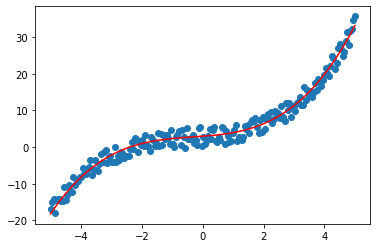

In [4]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)

# y = ax + dx^0
# y = ax^2+ bx + dx^0
# y = ax^3 + bx^2 + cx + dx^0

# y = w1 * x^1 + w2 * x^0

# W*X = Y
# w = y/x
# [[1], [2]]

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
# print(xx)

def lin_reg_mat(x,y):
    # (Xt * X)^-1 Xt * Y
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)


w = lin_reg_mat(xx, y)
print(w)

plt.scatter(x, f(x))
plt.plot(x, w[0]*x*x*x + w[1]*x*x + w[2]*x + w[3], "r")

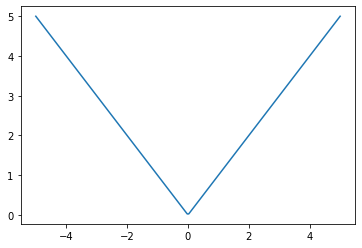

In [5]:
# Y  - tacna, stvarna vrednotst
# y - reyultat modela
# E(x) = abs(Y(x) - y(x))
x = np.linspace(-5, 5, 200)
y = np.abs(x)
plt.plot(x, y)

0.5034066064081031
0.07765113879265301 0.5034066064081031
0.06397732770240395 0.07765113879265301
0.05424710873032836 0.06397732770240395
0.04260827820120909 0.05424710873032836
0.008658761309845886 0.04260827820120909
0.0010428263107132808 0.008658761309845886
0.00030322320767595557 0.0010428263107132808
0.00019164329248553714 0.00030322320767595557
1.895735605273785e-05 0.00019164329248553714
1.4148063639396469e-05 1.895735605273785e-05


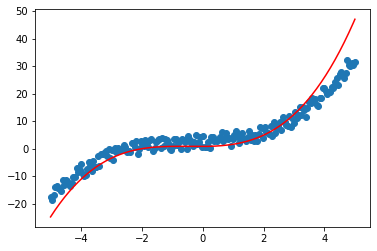

In [6]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))

# nasumicna pretraga, nasumicno bitamo tezine
def lin_reg_rand(x,y, n = 1000000 ):
    # w - tezinaa
    w = np.random.random(len(x[0]))
    y_p = x@w
    # print(y - y_p)
    e = np.abs(np.average(y - y_p))
    print(e)
    for i in range(n):
        wn = np.random.random(len(x[0]))
        y_p = x@wn
        en = np.abs(np.average(y- y_p))
        if en < e:
            print(en, e)
            e = en
            w = wn
    return w

w = lin_reg_rand(xx, y)
plt.scatter(x, f(x))
plt.plot(x, w[0]*x*x*x + w[1]*x*x + w[2]*x + w[3], "r")


45


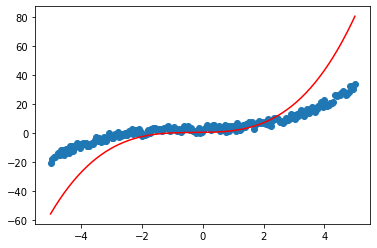

In [7]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))


def lin_reg_step(x, y, n = 1000, d = 0.1, t = 0.00001):
    w = np.random.random(len(x[0]))
    y_p = x@w
    e = np.abs(np.average(y - y_p))
    broj_azuriranja = 0
    for i in range(n):
        azurirano = False
        for i in range(len(w)):
            wnn = np.copy(w)               # kopija za modifikaciiju
            wnp = np.copy(w)
            wnp[i] += d
            y_p = x@wnp
            en = np.abs(np.average(y - y_p))
            if en < e:
                broj_azuriranja += 1
                azurirano = True 
                # ako je desno bolje, uzeti te vrednosti
                e = en
                w = wnp
            # pomeranje u levo
            wnn = np.copy(w)
            wnn[i] -= d
            y_p = x@wnn
            en = np.abs(np.average(y - y_p))
            if en < e:
                broj_azuriranja +=1
                azurirano = True
                # ako je desno bolje, uzeti te vrednosti
                e = en
                w = wnn
        if not azurirano:
            d = d/2
    print(broj_azuriranja)
    return w


w = lin_reg_step(xx, y)

plt.scatter(x, f(x))
plt.plot(x, w[0]*x*x*x + w[1]*x*x + w[2]*x + w[3], "r")

In [11]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))

# kvadratna funkcija

def lin_reg_sgd(x, y, lr = 0.000000001, t = 0.00001):
    w = np.random.random(len(x[0]))
    # lr - korak
    for _ in range(100):
        for i, xp in enumerate(x):
            wd = np.zeros(len(w))             # gradijent postavljen na 0           
            for j in range(len(w)):
                wd[j] = (2*(xp@w - y[i]*xp[j]))
            w -= lr*wd
       
    return w
    
w = lin_reg_sgd(xx, y)
y_p = xx@w

e = np.average((y - y_p)**2)
print(e)

plt.scatter(x, f(x))
plt.plot(x, xx@w, "r")

908.1523190863085
